In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("housing.csv")

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.impute import SimpleImputer

# Step 1: Drop target variable from original dataset
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 3: Apply imputer only on numerical columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy="median")
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])  # use transform only on test set

# Step 4: Join target back
train_data = X_train.join(y_train)


In [9]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

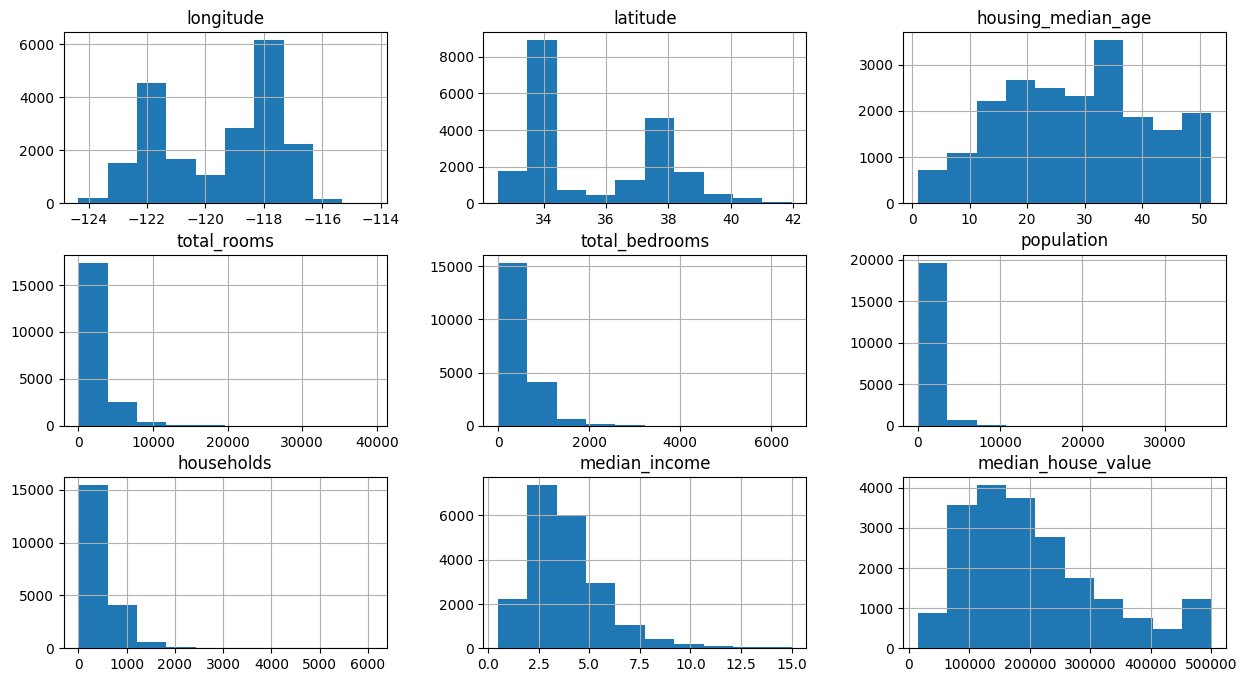

In [10]:
data.hist(figsize=(15,8))

<Axes: >

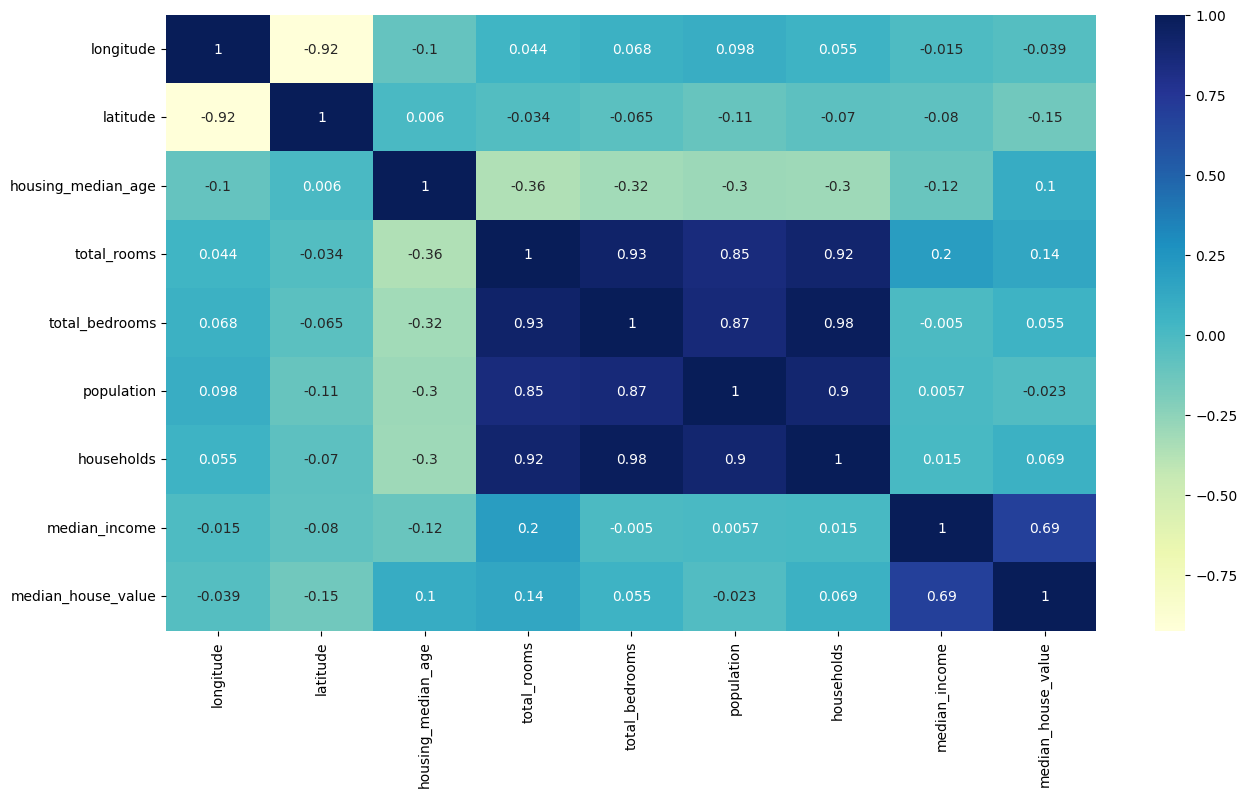

In [11]:
plt.figure(figsize=(15, 8))

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Now plot the correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")


In [12]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

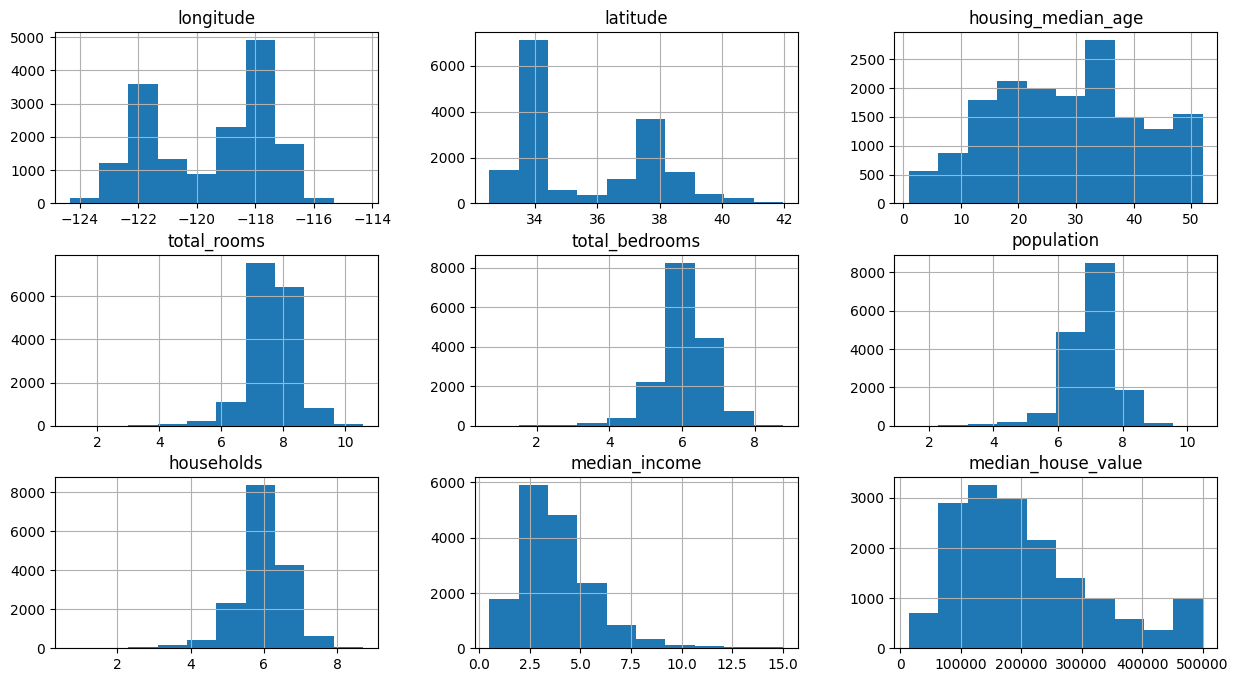

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data.ocean_proximity.value_counts()


ocean_proximity
<1H OCEAN     7239
INLAND        5207
NEAR OCEAN    2106
NEAR BAY      1792
ISLAND           2
Name: count, dtype: int64

In [15]:
print(train_data.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


<Axes: >

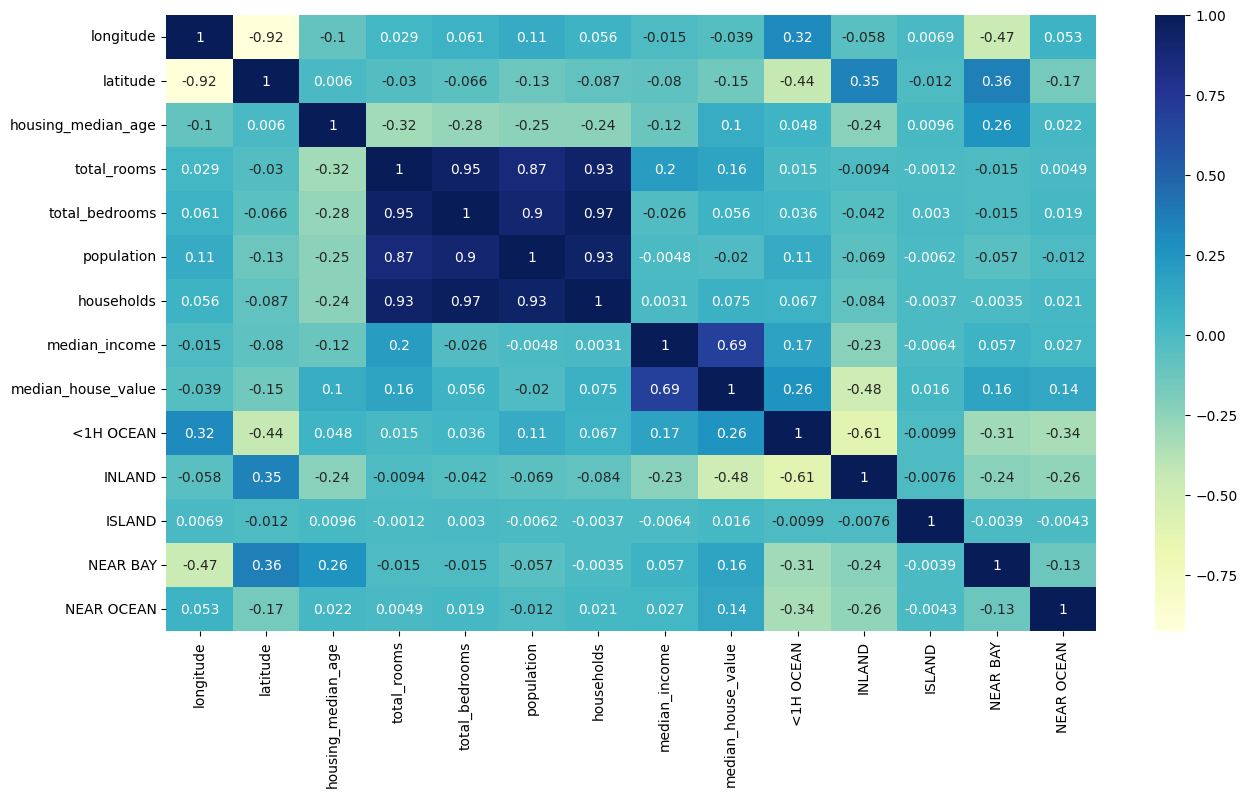

In [16]:
if 'ocean_proximity' in train_data.columns: train_data = pd.concat([train_data.drop('ocean_proximity', axis=1), pd.get_dummies(train_data['ocean_proximity'], prefix='', prefix_sep='')], axis=1)

plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")



<Axes: xlabel='latitude', ylabel='longitude'>

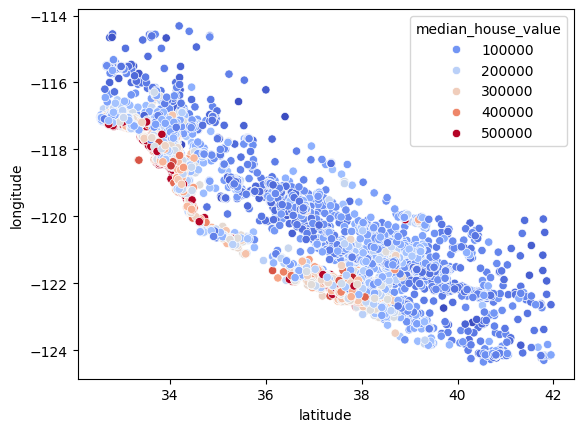

In [17]:
plt.figsize=(15,8)
sns.scatterplot(x="latitude",y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [18]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']


<Axes: >

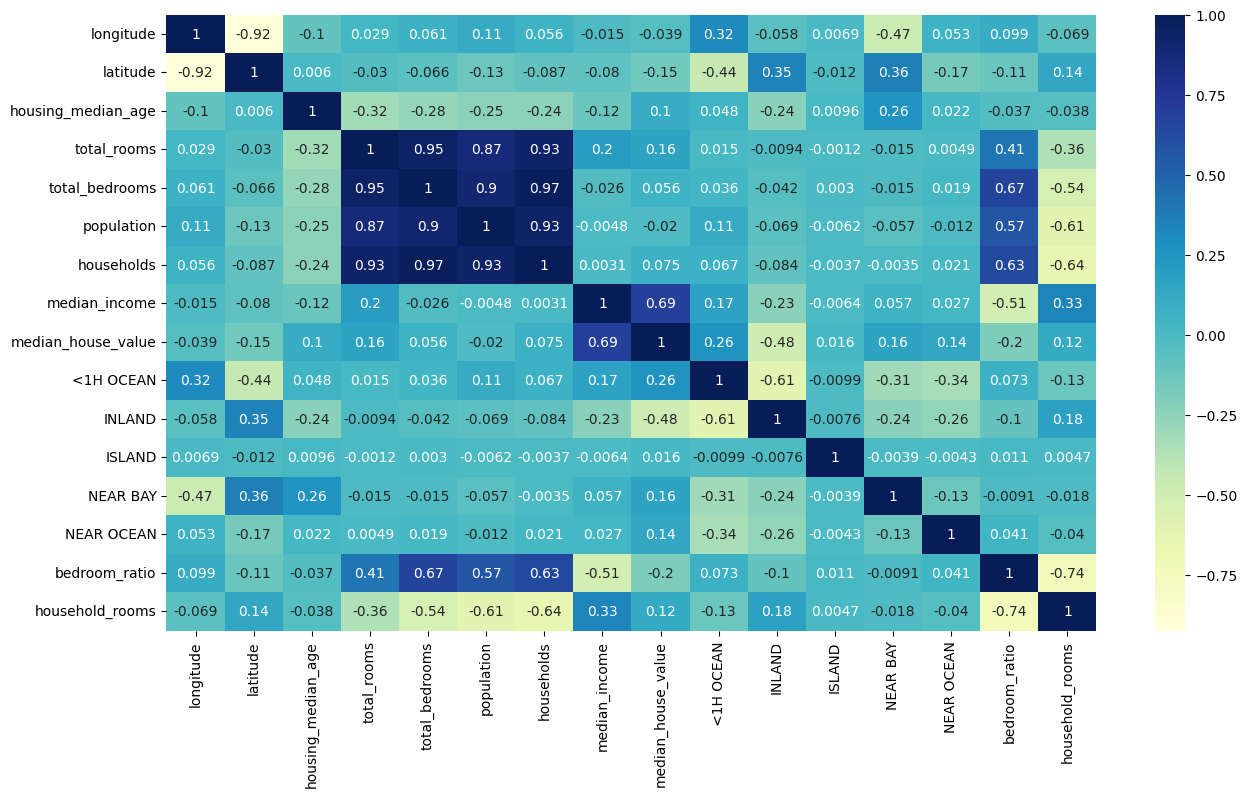

In [19]:
plt.figure(figsize=(15, 8))


# Now plot the correlation heatmap
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [20]:
# model using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=  StandardScaler()
X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s=scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [21]:
test_data=X_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
if 'ocean_proximity' in test_data.columns: test_data = pd.concat([test_data.drop('ocean_proximity', axis=1), pd.get_dummies(test_data['ocean_proximity'], prefix='', prefix_sep='')], axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [22]:

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test_s = scaler.transform(X_test)


In [23]:
reg.score(X_test_s,y_test)

0.6749282464896444

In [24]:
#model using RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()

In [25]:
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [26]:
forest.score(X_test_s,y_test)

0.8190951627063547

In [ ]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()
param_grid={
    "n_estimators":[30,50,100],
    "max_features":[8,12,20],
    "min_samples_split":[2,4,6,8],
    "max_depth":[None,4,8]
}
grid_search= GridSearchCV(forest,param_grid,cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s,y_train)

In [ ]:
grid_search.best_estimator_.score(X_test_s,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = reg.predict(X_test_s)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
